<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/MovingMassAndInductance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Moving Mass and Inductance</h1></b>

Dr. Bingsen Wang

3/15/2025
</center>

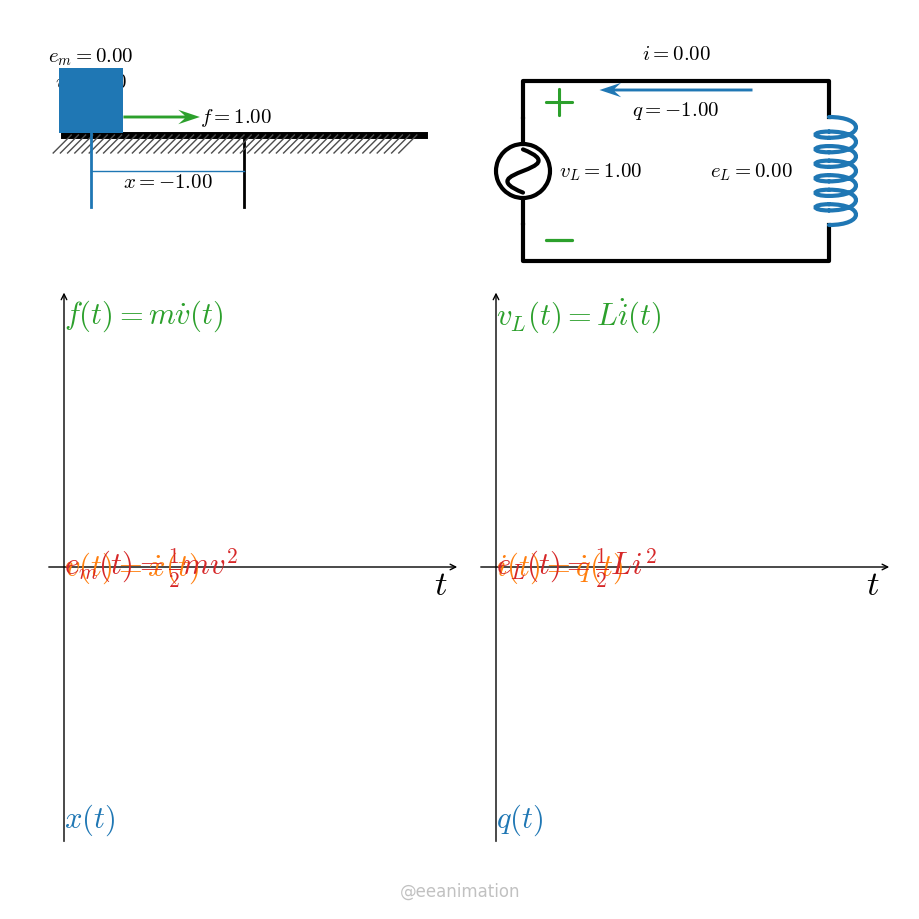

In [1]:
from matplotlib import pyplot,patches,cm,animation,path,transforms
import numpy as np
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

#draw inductor symbol
def draw_inductor(ax,x0,y0,n,w,h,theta=0,lw=1,c='k',alpha=1):
    w= w/(0.7*n+0.3)#width of larger coil
    verts,codes = [],[]
    for k in range(n): #larger coil half
        verts += [(x0+.7*k*w,y0),(x0+.7*k*w,y0+h),(x0+(.7*k+1)*w,y0+h),(x0+(.7*k+1)*w,y0)]
        codes += [path.Path.MOVETO]+[path.Path.CURVE4]*3
    for k in range(1,n): #smaller coil half
        verts += [(x0+.7*k*w,y0),(x0+.7*k*w,y0-h/2),(x0+(.7*k+.3)*w,y0-h/2),(x0+(.7*k+.3)*w,y0)]
        codes += [path.Path.MOVETO]+[path.Path.CURVE4]*3
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=c,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return

#draw ac voltage source symbol
def draw_voltage_source_ac(ax,x0,y0,h,theta=0,lw=1,color='k',alpha=1):
    verts = [(x0,y0),(x0+.25*h,y0),(x0+.75*h,y0),(x0+h,y0),(x0+.3*h,y0),(x0+.5*h,y0+.5*h),(x0+.5*h,y0-.5*h),(x0+.7*h,y0)]
    verts += list(path.Path.arc(0,360).vertices*.25*h+np.array([x0+.5*h,y0]))
    codes = [path.Path.MOVETO,path.Path.LINETO]*2 + [path.Path.MOVETO]+[path.Path.CURVE4]*3 + list(path.Path.arc(0,360).codes)
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=color,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return

#draw the +/- voltage polarity with variable distance/color
def draw_voltage_sign(ax,x0,y0,h,markersize=400,theta=0,lw=1,color='k'):
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.scatter(x0-.5*h,y0,marker='$+$',s=markersize,color=color,lw=lw,transform=rot)
    ax.scatter(x0+.5*h,y0,marker='$-$',s=markersize,color=color,lw=lw,transform=rot)
    return
def clear(ax):
  xlim,ylim = ax.get_xlim(),ax.get_ylim()
  ax.cla()
  ax.set_xlim(xlim); ax.set_ylim(ylim); ax.axis('off')
  return

Nf = 600 #number of animation frames
t = np.linspace(0,2*np.pi,Nf) #time series
xy = [[-.6,.9],[.6,.8]]  #origins of the moving mass and the circuit
xy1 = [[-1.1,-.3], [.1,-.3]] #origins of the plots
lx = 1; ly = .7 #waveform size
w,n = 1,50; dw = w/n
M,L = 1,1 #mass and inductance
ks = w/2*.85 #scaling factor to fit the plot
dx = -ks*np.cos(t) #displacement
v = ks*np.sin(t) #velocity
f = ks*np.cos(t)*M #force
em = ks*M/2*np.sin(t)**2 #kinetic energy
wrec = .18 #width and height of the moving mass
q = -ks*np.cos(t) #charge
iL = ks*np.sin(t) #current
vL = ks*np.cos(t)*L #voltage
eL = ks*L/2*np.sin(t)**2 #kinetic energy
h=.3 #height of the inductance and voltage source
cl = list(cm.tab10.colors) #color list
fig = pyplot.figure(figsize = ([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.25,1.25],ylim=[-1.25,1.25]);ax.axis('off')
ax1 = fig.add_axes([0,0,1,1],xlim=[-1.25,1.25],ylim=[-1.25,1.25],fc='none'); ax1.axis('off')
[ax.plot([xy[0][0]-w/2*(1-k),xy[0][0]+w/2*(1-k)],[xy[0][1],xy[0][1]-k*.2],lw=5-3*k,c='k') for k in range(2)]
[ax.plot([xy[0][0]-w/2+k*dw,xy[0][0]-w/2+k*dw-.05],[xy[0][1],xy[0][1]-.05],c='.3',lw=1) for k in range(1,n)]
[ax.annotate('',(xy1[k][0]+lx*1.1,xy1[k][1]),(xy1[k][0]-.05,xy1[k][1]),arrowprops={'arrowstyle':'->', 'color':'k', 'lw':1}) for k in range(2)]
[ax.annotate('',(xy1[k][0],xy1[k][1]+ly*1.1),(xy1[k][0],xy1[k][1]-ly*1.1),arrowprops={'arrowstyle':'->', 'color':'k'}) for k in range(2)]
[ax.text(xy1[k][0]+lx*1.1,xy1[k][1],'$t$  ',ha='right',va='top',size=25) for k in range(2)]
lines = [ax.plot([],[],c=cl[0],lw=2-k)[0] for k in range(2)]
lines += [ax.plot([],[],c=cl[k%4],lw=3)[0] for k in range(8)]
tx1 = [ax.text(0,0,'',size = 15,va=['top','center','center','bottom'][k],ha=['center','center','center','center'][k]) for k in range(4)]
tx1 += [ax.text(xy[1][0],xy[1][1]+[.2,.3][k],'',size = 15,ha='center',va=['top','bottom'][k]) for k in range(2)]
tx1 += [ax.text(xy[1][0]+(.1-ks)*(-1)**k,xy[1][1],'',size = 15,va='center',ha=['left','right',][k]) for k in range(2)]
tx2 = [ax.text(0,0,[r'$x(t)$',r'$v(t)=\dot x(t)$',r'$f(t)=m\dot v(t)$',r'$e_m(t)=\frac{1}{2}mv^2$'][k],
             c=cl[k],size=22,va='center') for k in range(4)]
tx2 += [ax.text(0,0,[r'$q(t)$',r'$i(t)=\dot q(t)$',r'$v_L(t)=L\dot i(t)$',r'$e_L(t)=\frac{1}{2}Li^2$'][k],
             c=cl[k],size=22,va='center') for k in range(4)]
draw_voltage_source_ac(ax,xy[1][0]-ks,xy[1][1]-h/2,.3,theta=90,lw=3)
[ax.plot([xy[1][0]-ks,xy[1][0]-ks,xy[1][0]+ks,xy[1][0]+ks],
 [xy[1][1]+h/2*(-1)**k,xy[1][1]+.25*(-1)**k,xy[1][1]+.25*(-1)**k,xy[1][1]+h/2*(-1)**k],lw=3,c='k') for k in range(2)]

def animate(i):
  vt,ft = v[i]*.5,f[i]*.5
  qt,iLt,vLt = q[i],iL[i],vL[i]*.9
  dir = [np.sign(vt),np.sign(ft)]
  xt = xy[0][0]+dx[i]
  lmd = em[i]/ks*2
  crecL = lmd*np.array(cl[3])+(1-lmd)*np.array(cl[0]) #blended color of the rectangle and inductance
  clear(ax1)
  ax1.add_patch(patches.FancyArrow(xy[1][0]-qt/2,xy[1][1]+.225,qt,0,width=0.008,
              head_width=.04,length_includes_head=True,overhang=.3,fc=cl[0],lw=0,zorder=2))
  ax1.add_patch(patches.FancyArrow(xy[1][0]-iLt/2,xy[1][1]+.275,iLt,0,width=0.008,
              head_width=.04,length_includes_head=True,overhang=.3,fc=cl[1],lw=0,zorder=2))
  draw_inductor(ax1,xy[1][0]+ks,xy[1][1]+h/2,7,h,h/3,theta=-90,lw=3,c=crecL)
  draw_voltage_sign(ax1,xy[1][0]-ks+.1,xy[1][1],vLt,theta=-90,markersize=400,color=cl[2])
  ax1.add_patch(patches.Rectangle([xt-wrec/2,xy[0][1]+.005],wrec,wrec,fc = crecL,ec = 'none'))
  [ax1.add_patch(patches.FancyArrow(xt+wrec/2*dir[k],xy[0][1]+.01+wrec/2+.05*(-1)**k,[vt,ft][k],0,width = 0.008,
            head_width = .04,length_includes_head = True,overhang = .3,fc = cl[1+k],lw = 0)) for k in range(2)]
  lines[0].set_data([xt,xt],[xy[0][1]+.01+wrec/2,xy[0][1]-.2])
  lines[1].set_data([xy[0][0],xt],[xy[0][1]-.1,xy[0][1]-.1])
  [lines[2+k].set_data(t[:i+1]/(2*np.pi)*lx+xy1[0][0],[dx,v,f,em][k][:i+1]/ks*ly+xy1[0][1]) for k in range(4)] #plots of mass
  [tx2[k].set_position([t[i]/(2*np.pi)*lx+xy1[0][0],[dx,v,f,em][k][i]/ks*ly+xy1[0][1]]) for k in range(4)]
  [lines[6+k].set_data(t[:i+1]/(2*np.pi)*lx+xy1[1][0],[dx,v,f,em][k][:i+1]/ks*ly+xy1[1][1]) for k in range(4)] #plots of inductance
  [tx2[k+4].set_position([t[i]/(2*np.pi)*lx+xy1[1][0],[dx,v,f,em][k][i]/ks*ly+xy1[1][1]]) for k in range(4)]
  [tx1[k].set_text([rf'$x={dx[i]/ks:.2f}$',rf'$v = {v[i]/ks:.2f}$',rf'$f={f[i]/ks:.2f}$',rf'$e_m = {em[i]/ks:.2f}$'][k]) for k in range(4)]
  [tx1[k].set_position([xt+[-dx[i]/2,wrec/2*dir[0]+vt,wrec/2*dir[1]+ft,0][k],
                        xy[0][1]+[-.1,wrec/2+.06,wrec/2-.04,wrec+.01][k]]) for k in range(4)]
  [tx1[k+1].set_ha(['center','left','right'][int(dir[k])]) for k in range(2)]
  [tx1[k+4].set_text([rf'$q={q[i]/ks:.2f}$',rf'$i = {iL[i]/ks:.2f}$',rf'$v_L={vL[i]/ks:.2f}$',rf'$e_L = {eL[i]/ks:.2f}$'][k]) for k in range(4)]
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size = 12,c = '.2',alpha = .3,ha = 'center',va = 'bottom')
anim  =  animation.FuncAnimation(fig, animate, frames = Nf, interval = 50)
anim.save("MovingMassInductance.mp4",writer = animation.FFMpegWriter(fps = 60),dpi = 200)